# Method 2 - Linear disaggregation by simulated energy consumption

In [8]:
import pandas as pd

file_path = r"C:\VITO\MODERATE\synthetic_households_all_simulated.xlsx" 
df = pd.read_excel(file_path) # columns: household_id, floor_area, construction_year
df['age'] = 2025 - df['construction_year']  # building age
print(df)

# Total annual street-level consumption (in kWh)
total_street_consumption = 3000000  # replace with the actual number from street level consumption, e.g. Fluvius data in BE

simulated_total = df['simulated_kWh'].sum()

# Compute scaling factor
scaling_factor = total_street_consumption / simulated_total

# Apply disaggregation
df['disaggregated_kWh'] = df['simulated_kWh'] * scaling_factor

# Save output
df[['household_id', 'disaggregated_kWh']].to_csv("annual_disaggregated.csv", index=False)

print(df[['household_id', 'disaggregated_kWh']])

    household_id  floor_area  construction_year  simulated_kWh  age
0             H1         152               1989    2104.194294   36
1             H2         229               1991    2601.625359   34
2             H3         142               1990    2081.330994   35
3             H4          64               1955    2061.921983   70
4             H5         156               2001    2161.894042   24
..           ...         ...                ...            ...  ...
995         H996         160               1964    2215.253558   61
996         H997         160               1992    2217.358575   33
997         H998          83               1997    2063.371788   28
998         H999         160               2019    2153.140923    6
999        H1000          57               1995    1300.104194   30

[1000 rows x 5 columns]
    household_id  disaggregated_kWh
0             H1        2902.738153
1             H2        3588.944809
2             H3        2871.198207
3             H

In [9]:
# Total annual street-level consumption (in kWh)
total_street_consumption = 3000000  # street/regional level consumption, e.g. Fluvius data in BE

simulated_total = df['simulated_kWh'].sum()

# Compute scaling factor
scaling_factor = total_street_consumption / simulated_total

# Apply disaggregation
df['disaggregated_kWh'] = df['simulated_kWh'] * scaling_factor

# Save output
df[['household_id', 'disaggregated_kWh']].to_csv("annual_disaggregated.csv", index=False)

print(df[['household_id', 'disaggregated_kWh']])

    household_id  disaggregated_kWh
0             H1        2902.738153
1             H2        3588.944809
2             H3        2871.198207
3             H4        2844.423457
4             H5        2982.335014
..           ...                ...
995         H996        3055.944520
996         H997        3058.848392
997         H998        2846.423465
998         H999        2970.260077
999        H1000        1793.495048

[1000 rows x 2 columns]


In [13]:
# Save results to Excel
output_path = r"C:\VITO\MODERATE\linear_disaggregation_energy.xlsx"
df.to_excel(output_path, index=False)

print("Done! File saved to:", output_path)

Done! File saved to: C:\VITO\MODERATE\linear_disaggregation_energy.xlsx


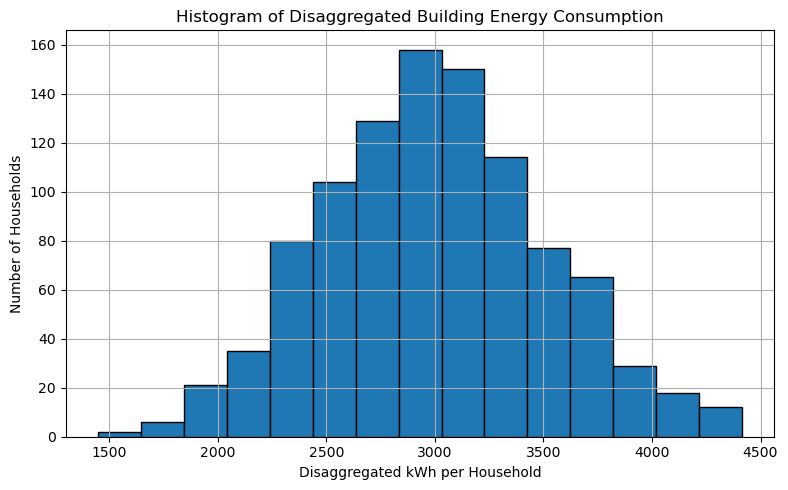

In [16]:
# Plot histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['disaggregated_kWh'], bins=15, edgecolor='black')
plt.title('Histogram of Disaggregated Building Energy Consumption')
plt.xlabel('Disaggregated kWh per Household')
plt.ylabel('Number of Households')
plt.grid(True)
plt.tight_layout()
plt.show()

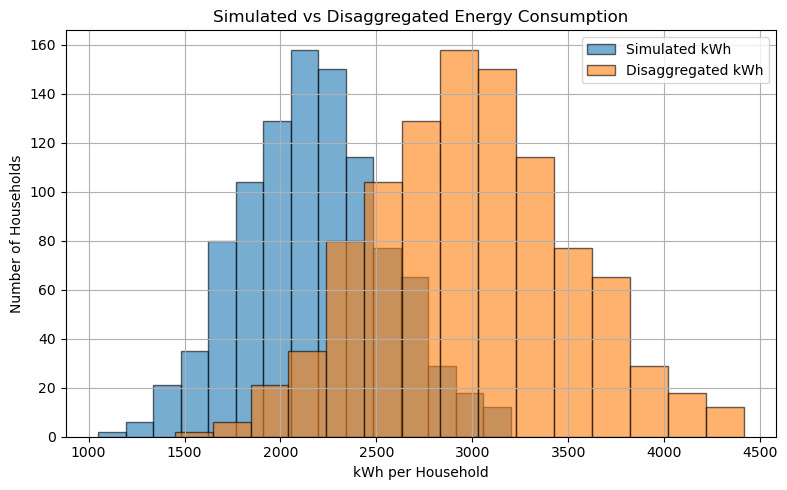

In [15]:
# Plot overlapping histograms
plt.figure(figsize=(8, 5))
plt.hist(df['simulated_kWh'], bins=15, alpha=0.6, label='Simulated kWh', edgecolor='black')
plt.hist(df['disaggregated_kWh'], bins=15, alpha=0.6, label='Disaggregated kWh', edgecolor='black')
plt.title('Simulated vs Disaggregated Energy Consumption')
plt.xlabel('kWh per Household')
plt.ylabel('Number of Households')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()